In [1]:
#Import packages
import pandas as pd
import numpy as np
import stats

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
#Reading in UCI credit card default data, 
#Found at: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

df_hdma = pd.read_csv(r'C:\Users\jordy\OneDrive\MSc_Python\Individual_Project\Data\Washington_State_HDMA_2016.csv')
df_hdma.head()

C:\Users\jordy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (23,24,25,28,29,30,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,121.690002,NaN,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,...,Female,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
1,83.370003,NaN,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
2,91.129997,NaN,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
3,146.169998,NaN,5032.0,8.590000,1525.0,1820.0,351,73300.0,315.0,Washington,...,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated
4,162.470001,NaN,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,...,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated


In [3]:
#summary statistics
df_hdma.describe()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,sequence_number,census_tract_number,as_of_year,application_date_indicator
count,465951.000000,8638.000000,465956.000000,465956.000000,465944.00000,465955.000000,466566.000000,465960.000000,404533.000000,4.665660e+05,465960.000000,466566.0,466566.000000
mean,106.906157,2.120028,5288.219117,24.765475,1389.05978,1822.137288,298.260936,76797.148468,112.984713,1.126340e+05,1395.489104,2016.0,0.207285
std,29.280418,1.113000,1665.350069,15.214602,506.75606,682.031693,760.741532,12959.051933,125.115972,2.020830e+05,2950.970895,0.0,0.609593
min,14.050000,1.500000,5.000000,2.040000,10.00000,10.000000,1.000000,48700.000000,1.000000,1.000000e+00,1.000000,2016.0,0.000000
25%,87.260002,1.590000,4124.000000,13.220000,1032.00000,1395.000000,172.000000,65800.000000,60.000000,5.121000e+03,117.010000,2016.0,0.000000
50%,104.529999,1.720000,5173.000000,20.750000,1359.00000,1734.000000,248.000000,73300.000000,89.000000,2.647200e+04,323.220000,2016.0,0.000000
75%,123.809998,2.000000,6342.000000,32.220001,1705.00000,2171.000000,350.000000,90300.000000,133.000000,1.095258e+05,702.030000,2016.0,0.000000
max,257.140015,13.660000,13025.000000,94.790001,2997.00000,5893.000000,99999.000000,90300.000000,9999.000000,1.241780e+06,9901.000000,2016.0,2.000000


In [4]:
#Check for any missing values
missing_values = df_hdma.isnull().any()

print(missing_values)

tract_to_msamd_income              True
rate_spread                        True
population                         True
minority_population                True
number_of_owner_occupied_units     True
number_of_1_to_4_family_units      True
loan_amount_000s                  False
hud_median_family_income           True
applicant_income_000s              True
state_name                        False
state_abbr                        False
sequence_number                   False
respondent_id                     False
purchaser_type_name               False
property_type_name                False
preapproval_name                  False
owner_occupancy_name              False
msamd_name                         True
loan_type_name                    False
loan_purpose_name                 False
lien_status_name                  False
hoepa_status_name                 False
edit_status_name                   True
denial_reason_name_3               True
denial_reason_name_2               True


In [5]:
df_len = len(df_hdma)
df_hdma.isnull().sum()/df_len

tract_to_msamd_income             0.001318
rate_spread                       0.981486
population                        0.001307
minority_population               0.001307
number_of_owner_occupied_units    0.001333
number_of_1_to_4_family_units     0.001310
loan_amount_000s                  0.000000
hud_median_family_income          0.001299
applicant_income_000s             0.132957
state_name                        0.000000
state_abbr                        0.000000
sequence_number                   0.000000
respondent_id                     0.000000
purchaser_type_name               0.000000
property_type_name                0.000000
preapproval_name                  0.000000
owner_occupancy_name              0.000000
msamd_name                        0.082033
loan_type_name                    0.000000
loan_purpose_name                 0.000000
lien_status_name                  0.000000
hoepa_status_name                 0.000000
edit_status_name                  0.840312
denial_reas

In [6]:
for column in df_hdma.columns:
    unique_values = df_hdma[column].unique()
    print(f"Unique values for column {column}: {unique_values}")
    print('\n')

Unique values for column tract_to_msamd_income: [121.6900024   83.37000275  91.12999725 ...  53.59000015  57.04999924
  27.69000053]


Unique values for column rate_spread: [  nan  1.91  1.79  1.92  1.62  1.65  1.57  1.54  1.67  1.51  3.92  1.5
  1.61  1.93  1.95  1.76  1.87  2.05  1.6   1.63  1.66  1.69  1.83  1.71
  1.58  1.52  5.69  3.9   3.35  5.05  1.55  2.54  4.76  4.65  2.16  2.95
  2.02  1.88  5.93  1.96  1.7   3.78  1.64  2.08  1.68  1.77  7.78  3.75
  1.97  5.03  1.78  2.23  2.21  2.07  2.03  2.52  3.96  1.85  2.24  1.73
  1.84  2.19  3.74  2.11  2.29  1.8   2.57  1.59  2.1   2.27  4.27  4.24
  2.38  1.74  2.39  6.2   1.94  1.98  8.5   1.53  3.76  4.16  2.    2.18
  3.24  2.69  1.82  2.7   2.33  6.75  4.09  3.07  3.46  1.56  5.94  2.46
  1.81  5.85  2.36  3.51  2.06  1.89  6.44  1.72  3.84  3.02  1.75  5.14
  1.86  8.25  5.34  2.13  5.21  3.57  1.9   1.99  2.17  3.97  2.22  7.55
  6.48  3.66  2.34  4.73  2.14  2.12  5.52  2.25  4.42  3.65  2.04  2.01
  3.42  3.38  2.31  3.47 

Unique values for column purchaser_type_name: ['Freddie Mac (FHLMC)'
 'Life insurance company, credit union, mortgage bank, or finance company'
 'Loan was not originated or was not sold in calendar year covered by register'
 'Ginnie Mae (GNMA)' 'Fannie Mae (FNMA)'
 'Commercial bank, savings bank or savings association'
 'Other type of purchaser' 'Affiliate institution'
 'Private securitization' 'Farmer Mac (FAMC)']


Unique values for column property_type_name: ['One-to-four family dwelling (other than manufactured housing)'
 'Manufactured housing' 'Multifamily dwelling']


Unique values for column preapproval_name: ['Not applicable' 'Preapproval was not requested'
 'Preapproval was requested']


Unique values for column owner_occupancy_name: ['Owner-occupied as a principal dwelling'
 'Not owner-occupied as a principal dwelling' 'Not applicable']


Unique values for column msamd_name: ['Portland, Vancouver, Hillsboro - OR, WA' 'Walla Walla - WA'
 'Bremerton, Silverdale - WA' 'Tacoma, L

In [7]:
df_hdma_miss = df_hdma[['co_applicant_race_name_2', 
'co_applicant_race_name_3', 
'co_applicant_race_name_4', 
'co_applicant_race_name_5',
'applicant_race_name_2',
'applicant_race_name_3',
'applicant_race_name_4', 
'applicant_race_name_5',
'edit_status_name',
'denial_reason_name_1',
'denial_reason_name_2',
'denial_reason_name_3',
'msamd_name',
'applicant_income_000s',
'rate_spread']]

In [8]:
for column in df_hdma_miss.columns:
    unique_values = df_hdma_miss[column].unique()
    print(f"Unique values for column {column}: {unique_values}")
    print('\n')

Unique values for column co_applicant_race_name_2: [nan 'American Indian or Alaska Native' 'White'
 'Native Hawaiian or Other Pacific Islander' 'Black or African American'
 'Asian']


Unique values for column co_applicant_race_name_3: [nan 'Native Hawaiian or Other Pacific Islander' 'White'
 'Black or African American']


Unique values for column co_applicant_race_name_4: [nan 'Native Hawaiian or Other Pacific Islander' 'White']


Unique values for column co_applicant_race_name_5: [nan 'White']


Unique values for column applicant_race_name_2: [nan 'White' 'Asian' 'Native Hawaiian or Other Pacific Islander'
 'American Indian or Alaska Native' 'Black or African American']


Unique values for column applicant_race_name_3: [nan 'Black or African American' 'White'
 'American Indian or Alaska Native'
 'Native Hawaiian or Other Pacific Islander' 'Asian']


Unique values for column applicant_race_name_4: [nan 'White' 'Native Hawaiian or Other Pacific Islander' 'Asian'
 'Black or African Ameri

In [9]:
#Write code which swaps race name for 0, 1, 2 etc. then swap NaN to 0?

df = df_hdma_miss.copy()

# Create a dictionary to store the mapping of unique entries to numbers
unique_mapping = {}

# Loop through each column
for column in df.columns:
    # Get the unique entries for the column
    unique_entries = df[column].dropna().unique()
    
    # Assign a number to each unique entry and replace the original entry
    for i, entry in enumerate(unique_entries):
        number = i + 1
        df[column] = df[column].replace(entry, number)
        unique_mapping[(column, entry)] = number
    
    # Assign 0 as the number for NaN values and replace the original entry
    df[column] = df[column].fillna(0)
    unique_mapping[(column, np.nan)] = 0

# Print the DataFrame with replaced entries
print(df)

# Print the unique mapping (including NaN)
for key, value in unique_mapping.items():
    column, entry = key
    print(f"Column: {column}, Entry: {entry}, Number: {value}")





        co_applicant_race_name_2  co_applicant_race_name_3  \
0                            0.0                       0.0   
1                            0.0                       0.0   
2                            0.0                       0.0   
3                            0.0                       0.0   
4                            0.0                       0.0   
...                          ...                       ...   
466561                       0.0                       0.0   
466562                       0.0                       0.0   
466563                       0.0                       0.0   
466564                       0.0                       0.0   
466565                       0.0                       0.0   

        co_applicant_race_name_4  co_applicant_race_name_5  \
0                            0.0                       0.0   
1                            0.0                       0.0   
2                            0.0                       0.0   
3      

In [10]:
#check df for missing values
df.isna().sum()


co_applicant_race_name_2    0
co_applicant_race_name_3    0
co_applicant_race_name_4    0
co_applicant_race_name_5    0
applicant_race_name_2       0
applicant_race_name_3       0
applicant_race_name_4       0
applicant_race_name_5       0
edit_status_name            0
denial_reason_name_1        0
denial_reason_name_2        0
denial_reason_name_3        0
msamd_name                  0
applicant_income_000s       0
rate_spread                 0
dtype: int64

In [11]:
#selecting columns that have 0 or very few missing entries
columns_not_in_miss = df_hdma.columns.difference(df_hdma_miss.columns)

df_hdma_not_in_miss = df_hdma[columns_not_in_miss]


In [12]:
df_hdma_not_in_miss.isna().sum()

action_taken_name                   0
agency_abbr                         0
agency_name                         0
applicant_ethnicity_name            0
applicant_race_name_1               0
applicant_sex_name                  0
application_date_indicator          0
as_of_year                          0
census_tract_number               606
co_applicant_ethnicity_name         0
co_applicant_race_name_1            0
co_applicant_sex_name               0
county_name                       367
hoepa_status_name                   0
hud_median_family_income          606
lien_status_name                    0
loan_amount_000s                    0
loan_purpose_name                   0
loan_type_name                      0
minority_population               610
number_of_1_to_4_family_units     611
number_of_owner_occupied_units    622
owner_occupancy_name                0
population                        610
preapproval_name                    0
property_type_name                  0
purchaser_ty

In [13]:
# census_tract_number
# tract_to_msamd_income
# population
# number_of_owner_occupied_units
# number_of_1_to_4_family_units
# minority_population
# hud_median_family_income
# county_name

In [14]:
df_hdma.dtypes

tract_to_msamd_income             float64
rate_spread                       float64
population                        float64
minority_population               float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
loan_amount_000s                    int64
hud_median_family_income          float64
applicant_income_000s             float64
state_name                         object
state_abbr                         object
sequence_number                     int64
respondent_id                      object
purchaser_type_name                object
property_type_name                 object
preapproval_name                   object
owner_occupancy_name               object
msamd_name                         object
loan_type_name                     object
loan_purpose_name                  object
lien_status_name                   object
hoepa_status_name                  object
edit_status_name                   object
denial_reason_name_3              

In [15]:
#drop respondent_id and as_of_year
df_hdma1 = df_hdma.drop(columns=['as_of_year', 'respondent_id', 'state_name', 'state_abbr', 'rate_spread' ])

In [16]:
#Count the number of rows which have all attribtutes 
# df_hdma[df_hdma.isna().sum(axis=1) >= 23]


## Applying logic to entire dataset

In [17]:
df_hdma_encoded = df_hdma1.copy()

# Create a dictionary to store the mapping of unique entries to numbers
unique_mapping = {}

# Loop through each column
for column in df_hdma_encoded.columns:
    if df_hdma_encoded[column].dtype == 'object':  # Apply logic only to object columns
        # Get the unique entries for the column
        unique_entries = df_hdma_encoded[column].dropna().unique()

        # Assign a number to each unique entry and replace the original entry
        for i, entry in enumerate(unique_entries):
            number = i + 1
            df_hdma_encoded[column] = df_hdma_encoded[column].replace(entry, number)
            unique_mapping[(column, entry)] = number

        # Assign 0 as the number for NaN values and replace the original entry
        df_hdma_encoded[column] = df_hdma_encoded[column].fillna(0)
        unique_mapping[(column, np.nan)] = 0

# Print the DataFrame with replaced entries
print(df_hdma_encoded)

# Print the unique mapping (including NaN)
for key, value in unique_mapping.items():
    column, entry = key
    print(f"Column: {column}, Entry: {entry}, Number: {value}")

        tract_to_msamd_income  population  minority_population  \
0                  121.690002      8381.0            23.790001   
1                   83.370003      4915.0            23.990000   
2                   91.129997      5075.0            11.820000   
3                  146.169998      5032.0             8.590000   
4                  162.470001      5183.0            10.500000   
...                       ...         ...                  ...   
466561                    NaN         NaN                  NaN   
466562                    NaN         NaN                  NaN   
466563                    NaN         NaN                  NaN   
466564              88.690002      4725.0            45.880001   
466565             128.690002      3657.0            21.410000   

        number_of_owner_occupied_units  number_of_1_to_4_family_units  \
0                               2175.0                         2660.0   
1                               1268.0                       

In [18]:
#Check for duplicates
duplicate = df_hdma_encoded[df_hdma_encoded.duplicated()] 
print("Duplicate Rows :") 
duplicate 

Duplicate Rows :


,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,sequence_number,purchaser_type_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name


In [19]:
#Data types
df_hdma_encoded.dtypes

tract_to_msamd_income             float64
population                        float64
minority_population               float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
loan_amount_000s                    int64
hud_median_family_income          float64
applicant_income_000s             float64
sequence_number                     int64
purchaser_type_name                 int64
property_type_name                  int64
preapproval_name                    int64
owner_occupancy_name                int64
msamd_name                        float64
loan_type_name                      int64
loan_purpose_name                   int64
lien_status_name                    int64
hoepa_status_name                   int64
edit_status_name                  float64
denial_reason_name_3              float64
denial_reason_name_2              float64
denial_reason_name_1              float64
county_name                       float64
co_applicant_sex_name             

In [20]:
#census_tract_number
# applicant_income_000s
# hud_median_family_income
# number_of_1_to_4_family_units
# number_of_owner_occupied_units
# minority_population
# population
# tract_to_msamd_income



for column in df_hdma_encoded.columns:
    unique_values = df_hdma_encoded[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")
    print('\n')

Unique values in column 'tract_to_msamd_income': [121.6900024   83.37000275  91.12999725 ...  53.59000015  57.04999924
  27.69000053]


Unique values in column 'population': [8.381e+03 4.915e+03 5.075e+03 ... 1.392e+03 1.703e+03 5.000e+00]


Unique values in column 'minority_population': [23.79000092 23.98999977 11.81999969 ... 29.67000008 15.80000019
 60.        ]


Unique values in column 'number_of_owner_occupied_units': [2175. 1268. 1136. ...   14.  209.   22.]


Unique values in column 'number_of_1_to_4_family_units': [2660. 1777. 1838. ...   63.  391.   22.]


Unique values in column 'loan_amount_000s': [  227   240   241 ...  2354  2340 19341]


Unique values in column 'hud_median_family_income': [73300. 57900. 78100. 72300. 90300. 73600. 61400. 69900. 48700. 61800.
 65800. 61300. 55600. 63100. 59400.    nan]


Unique values in column 'applicant_income_000s': [ 116.   42.  117. ... 1193. 1752. 1621.]


Unique values in column 'sequence_number': [119969  52605   6210 ... 414299 7

In [21]:
for column in df_hdma_encoded.columns:
    contains_zero = 0.0 in df_hdma_encoded[column].values
    print(f"Column '{column}' contains 0: {contains_zero}")

Column 'tract_to_msamd_income' contains 0: False
Column 'population' contains 0: False
Column 'minority_population' contains 0: False
Column 'number_of_owner_occupied_units' contains 0: False
Column 'number_of_1_to_4_family_units' contains 0: False
Column 'loan_amount_000s' contains 0: False
Column 'hud_median_family_income' contains 0: False
Column 'applicant_income_000s' contains 0: False
Column 'sequence_number' contains 0: False
Column 'purchaser_type_name' contains 0: False
Column 'property_type_name' contains 0: False
Column 'preapproval_name' contains 0: False
Column 'owner_occupancy_name' contains 0: False
Column 'msamd_name' contains 0: True
Column 'loan_type_name' contains 0: False
Column 'loan_purpose_name' contains 0: False
Column 'lien_status_name' contains 0: False
Column 'hoepa_status_name' contains 0: False
Column 'edit_status_name' contains 0: True
Column 'denial_reason_name_3' contains 0: True
Column 'denial_reason_name_2' contains 0: True
Column 'denial_reason_name_1

In [22]:
#Checking remaining missing values

df_hdma_encoded.isna().sum()

tract_to_msamd_income               615
population                          610
minority_population                 610
number_of_owner_occupied_units      622
number_of_1_to_4_family_units       611
loan_amount_000s                      0
hud_median_family_income            606
applicant_income_000s             62033
sequence_number                       0
purchaser_type_name                   0
property_type_name                    0
preapproval_name                      0
owner_occupancy_name                  0
msamd_name                            0
loan_type_name                        0
loan_purpose_name                     0
lien_status_name                      0
hoepa_status_name                     0
edit_status_name                      0
denial_reason_name_3                  0
denial_reason_name_2                  0
denial_reason_name_1                  0
county_name                           0
co_applicant_sex_name                 0
co_applicant_race_name_5              0


In [23]:
#Change all NaN values to 0 and check no remaining missing values


df_hdma_encoded.fillna(0, inplace=True)
df_hdma_encoded.isna().sum()




tract_to_msamd_income             0
population                        0
minority_population               0
number_of_owner_occupied_units    0
number_of_1_to_4_family_units     0
loan_amount_000s                  0
hud_median_family_income          0
applicant_income_000s             0
sequence_number                   0
purchaser_type_name               0
property_type_name                0
preapproval_name                  0
owner_occupancy_name              0
msamd_name                        0
loan_type_name                    0
loan_purpose_name                 0
lien_status_name                  0
hoepa_status_name                 0
edit_status_name                  0
denial_reason_name_3              0
denial_reason_name_2              0
denial_reason_name_1              0
county_name                       0
co_applicant_sex_name             0
co_applicant_race_name_5          0
co_applicant_race_name_4          0
co_applicant_race_name_3          0
co_applicant_race_name_2    

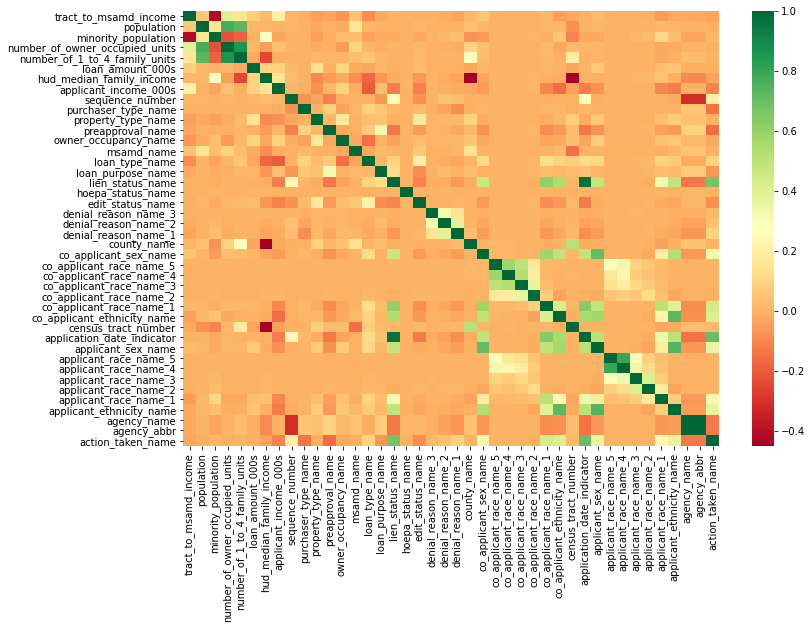

In [24]:
# Compute field correlations
cm = df_hdma_encoded.corr()

# Graph the correlations
plt.figure(figsize=(12, 8)) 
sns.heatmap(cm, cmap='RdYlGn')
plt.show()

Limit balance seemin gto have a medium negative correlation with repayment status, then slight posuitive correlation with bill amount and actual pay amt. Relatively uncorrelated with default next month interestingly. Slight neg corr with education. 

Temporal correlations observed between the repayment status feastures, seen with the gradient. Same observed with the bill amount and pay amount features. Pay_0 has the least temporal correlative strength, seen with a consistent lighter colour after pay_2.



In [26]:
#Export df_hdma_encoded to csv
df_hdma_encoded.to_csv('df_hdma_encoded.csv')

In [144]:
# #Drop target variable default.payment.next.month and ID from dataset in preparation for PCA and 2D representation
# df_hdma2 = df_hdma1.drop(columns=['action_taken_name'])
# df_hdma2.columns
features = df_hdma_encoded.drop(columns=['action_taken_name'])
features.columns

Index(['tract_to_msamd_income', 'population', 'minority_population',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'loan_amount_000s', 'hud_median_family_income', 'applicant_income_000s',
       'sequence_number', 'purchaser_type_name', 'property_type_name',
       'preapproval_name', 'owner_occupancy_name', 'msamd_name',
       'loan_type_name', 'loan_purpose_name', 'lien_status_name',
       'hoepa_status_name', 'edit_status_name', 'denial_reason_name_3',
       'denial_reason_name_2', 'denial_reason_name_1', 'county_name',
       'co_applicant_sex_name', 'co_applicant_race_name_5',
       'co_applicant_race_name_4', 'co_applicant_race_name_3',
       'co_applicant_race_name_2', 'co_applicant_race_name_1',
       'co_applicant_ethnicity_name', 'census_tract_number',
       'application_date_indicator', 'applicant_sex_name',
       'applicant_race_name_5', 'applicant_race_name_4',
       'applicant_race_name_3', 'applicant_race_name_2',
       'appli

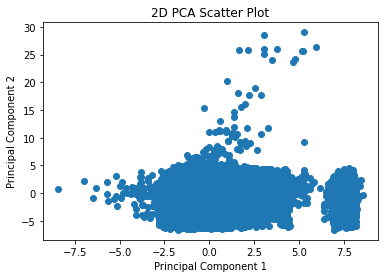

In [145]:
# Separate the features from the target variable (if applicable)
features = df_hdma_encoded.drop(columns=['action_taken_name'])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the scatter plot of the two most principal components
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Scatter Plot')
plt.show()

t-SNE Progress:   0%|                                                                       | 0/466566 [00:00<?, ?it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   0%|                                                            | 100/466566 [00:00<28:02, 277.21it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   0%|       

t-SNE Progress:   0%|▏                                                          | 1700/466566 [00:06<29:13, 265.16it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   0%|▏                                                          | 1800/466566 [00:06<28:57, 267.46it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   0%|▏      

t-SNE Progress:   1%|▍                                                          | 3400/466566 [00:13<32:23, 238.29it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   1%|▍                                                          | 3500/466566 [00:13<33:36, 229.65it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   1%|▍      

t-SNE Progress:   1%|▋                                                          | 5100/466566 [00:20<31:43, 242.45it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   1%|▋                                                          | 5200/466566 [00:20<32:12, 238.69it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   1%|▋      

t-SNE Progress:   1%|▊                                                          | 6800/466566 [00:27<32:09, 238.28it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   1%|▊                                                          | 6900/466566 [00:28<32:47, 233.61it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   2%|▉      

t-SNE Progress:   2%|█                                                          | 8500/466566 [00:34<29:21, 260.08it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   2%|█                                                          | 8600/466566 [00:35<29:39, 257.37it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   2%|█      

t-SNE Progress:   2%|█▎                                                        | 10200/466566 [00:41<29:54, 254.25it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   2%|█▎                                                        | 10300/466566 [00:41<29:44, 255.69it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   2%|█▎     

t-SNE Progress:   3%|█▍                                                        | 11900/466566 [00:47<28:26, 266.39it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   3%|█▍                                                        | 12000/466566 [00:48<28:09, 269.00it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   3%|█▌     

t-SNE Progress:   3%|█▋                                                        | 13600/466566 [00:54<27:12, 277.40it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   3%|█▋                                                        | 13700/466566 [00:54<27:47, 271.65it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   3%|█▋     

t-SNE Progress:   3%|█▉                                                        | 15300/466566 [01:00<28:05, 267.76it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   3%|█▉                                                        | 15400/466566 [01:00<27:45, 270.96it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   3%|█▉     

t-SNE Progress:   4%|██                                                        | 17000/466566 [01:06<30:27, 245.94it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   4%|██▏                                                       | 17100/466566 [01:07<30:32, 245.24it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   4%|██▏    

t-SNE Progress:   4%|██▎                                                       | 18700/466566 [01:13<30:20, 245.95it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   4%|██▎                                                       | 18800/466566 [01:14<30:11, 247.16it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   4%|██▎    

t-SNE Progress:   4%|██▌                                                       | 20400/466566 [01:20<30:05, 247.17it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   4%|██▌                                                       | 20500/466566 [01:21<30:15, 245.73it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   4%|██▌    

t-SNE Progress:   5%|██▋                                                       | 22100/466566 [01:26<27:05, 273.37it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   5%|██▊                                                       | 22200/466566 [01:27<26:54, 275.30it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   5%|██▊    

t-SNE Progress:   5%|██▉                                                       | 23800/466566 [01:33<27:57, 263.89it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   5%|██▉                                                       | 23900/466566 [01:33<27:52, 264.65it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   5%|██▉    

t-SNE Progress:   5%|███▏                                                      | 25500/466566 [01:39<27:55, 263.32it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   5%|███▏                                                      | 25600/466566 [01:40<27:31, 267.01it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   6%|███▏   

t-SNE Progress:   6%|███▍                                                      | 27200/466566 [01:45<26:08, 280.16it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   6%|███▍                                                      | 27300/466566 [01:46<26:52, 272.46it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   6%|███▍   

t-SNE Progress:   6%|███▌                                                      | 28900/466566 [01:51<26:14, 277.99it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   6%|███▌                                                      | 29000/466566 [01:52<26:16, 277.63it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   6%|███▌   

t-SNE Progress:   7%|███▊                                                      | 30600/466566 [01:57<25:52, 280.84it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   7%|███▊                                                      | 30700/466566 [01:58<26:01, 279.14it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   7%|███▊   

t-SNE Progress:   7%|████                                                      | 32300/466566 [02:04<26:40, 271.29it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   7%|████                                                      | 32400/466566 [02:04<26:32, 272.57it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   7%|████   

t-SNE Progress:   7%|████▏                                                     | 34000/466566 [02:09<24:57, 288.84it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   7%|████▏                                                     | 34100/466566 [02:10<25:35, 281.61it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   7%|████▎  

t-SNE Progress:   8%|████▍                                                     | 35700/466566 [02:16<29:09, 246.23it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   8%|████▍                                                     | 35800/466566 [02:17<29:07, 246.45it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   8%|████▍  

t-SNE Progress:   8%|████▋                                                     | 37400/466566 [02:23<26:34, 269.10it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   8%|████▋                                                     | 37500/466566 [02:23<27:20, 261.61it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   8%|████▋  

t-SNE Progress:   8%|████▊                                                     | 39100/466566 [02:29<25:23, 280.59it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   8%|████▊                                                     | 39200/466566 [02:30<25:26, 279.91it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   8%|████▉  

t-SNE Progress:   9%|█████                                                     | 40800/466566 [02:35<24:11, 293.24it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   9%|█████                                                     | 40900/466566 [02:36<24:33, 288.87it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   9%|█████  

t-SNE Progress:   9%|█████▎                                                    | 42500/466566 [02:42<25:53, 272.97it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   9%|█████▎                                                    | 42600/466566 [02:42<24:58, 282.85it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   9%|█████▎ 

t-SNE Progress:   9%|█████▍                                                    | 44200/466566 [02:48<25:11, 279.36it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:   9%|█████▌                                                    | 44300/466566 [02:48<25:40, 274.10it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  10%|█████▌ 

t-SNE Progress:  10%|█████▋                                                    | 45900/466566 [02:54<24:31, 285.80it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  10%|█████▋                                                    | 46000/466566 [02:54<24:47, 282.67it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  10%|█████▋ 

t-SNE Progress:  10%|█████▉                                                    | 47600/466566 [03:00<25:11, 277.16it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  10%|█████▉                                                    | 47700/466566 [03:00<26:04, 267.74it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  10%|█████▉ 

t-SNE Progress:  11%|██████▏                                                   | 49300/466566 [03:06<25:43, 270.32it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  11%|██████▏                                                   | 49400/466566 [03:06<25:11, 276.08it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  11%|██████▏

t-SNE Progress:  11%|██████▎                                                   | 51000/466566 [03:12<24:34, 281.85it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  11%|██████▎                                                   | 51100/466566 [03:13<25:14, 274.29it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  11%|██████▎

t-SNE Progress:  11%|██████▌                                                   | 52700/466566 [03:18<24:03, 286.65it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  11%|██████▌                                                   | 52800/466566 [03:19<23:58, 287.54it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  11%|██████▌

t-SNE Progress:  12%|██████▊                                                   | 54400/466566 [03:24<24:26, 281.13it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  12%|██████▊                                                   | 54500/466566 [03:25<24:29, 280.42it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  12%|██████▊

t-SNE Progress:  12%|██████▉                                                   | 56100/466566 [03:31<25:06, 272.49it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  12%|██████▉                                                   | 56200/466566 [03:31<24:57, 274.09it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  12%|██████▉

t-SNE Progress:  12%|███████▏                                                  | 57800/466566 [03:37<25:23, 268.26it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  12%|███████▏                                                  | 57900/466566 [03:37<25:30, 266.94it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  12%|███████

t-SNE Progress:  13%|███████▍                                                  | 59500/466566 [03:43<24:51, 272.99it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  13%|███████▍                                                  | 59600/466566 [03:44<24:54, 272.31it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  13%|███████

t-SNE Progress:  13%|███████▌                                                  | 61200/466566 [03:49<24:13, 278.91it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  13%|███████▌                                                  | 61300/466566 [03:50<24:21, 277.24it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  13%|███████

t-SNE Progress:  13%|███████▊                                                  | 62900/466566 [03:56<24:33, 273.89it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  14%|███████▊                                                  | 63000/466566 [03:56<24:29, 274.60it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  14%|███████

t-SNE Progress:  14%|████████                                                  | 64600/466566 [04:02<24:22, 274.76it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  14%|████████                                                  | 64700/466566 [04:02<24:21, 275.03it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  14%|███████

t-SNE Progress:  14%|████████▏                                                 | 66300/466566 [04:08<24:15, 274.98it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  14%|████████▎                                                 | 66400/466566 [04:08<24:40, 270.33it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  14%|███████

t-SNE Progress:  15%|████████▍                                                 | 68000/466566 [04:14<27:01, 245.85it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  15%|████████▍                                                 | 68100/466566 [04:15<26:31, 250.34it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  15%|███████

t-SNE Progress:  15%|████████▋                                                 | 69700/466566 [04:21<26:50, 246.47it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  15%|████████▋                                                 | 69800/466566 [04:22<26:45, 247.08it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  15%|███████

t-SNE Progress:  15%|████████▉                                                 | 71400/466566 [04:28<25:23, 259.41it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  15%|████████▉                                                 | 71500/466566 [04:28<25:17, 260.32it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  15%|███████

t-SNE Progress:  16%|█████████                                                 | 73100/466566 [04:34<23:44, 276.14it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  16%|█████████                                                 | 73200/466566 [04:35<23:46, 275.77it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  16%|███████

t-SNE Progress:  16%|█████████▎                                                | 74800/466566 [04:40<23:51, 273.65it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  16%|█████████▎                                                | 74900/466566 [04:41<23:49, 273.99it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  16%|███████

t-SNE Progress:  16%|█████████▌                                                | 76500/466566 [04:46<23:20, 278.56it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  16%|█████████▌                                                | 76600/466566 [04:47<23:21, 278.16it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  16%|███████

t-SNE Progress:  17%|█████████▋                                                | 78200/466566 [04:53<23:34, 274.49it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  17%|█████████▋                                                | 78300/466566 [04:53<24:01, 269.26it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  17%|███████

t-SNE Progress:  17%|█████████▉                                                | 79900/466566 [04:59<23:15, 277.05it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  17%|█████████▉                                                | 80000/466566 [04:59<23:15, 276.94it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  17%|███████

t-SNE Progress:  17%|██████████▏                                               | 81600/466566 [05:05<23:07, 277.36it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  18%|██████████▏                                               | 81700/466566 [05:05<23:11, 276.50it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  18%|███████

t-SNE Progress:  18%|██████████▎                                               | 83300/466566 [05:11<23:23, 273.13it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  18%|██████████▎                                               | 83400/466566 [05:11<23:18, 273.99it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  18%|███████

t-SNE Progress:  18%|██████████▌                                               | 85000/466566 [05:17<22:56, 277.27it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  18%|██████████▌                                               | 85100/466566 [05:17<23:23, 271.81it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  18%|███████

t-SNE Progress:  19%|██████████▊                                               | 86700/466566 [05:23<22:49, 277.28it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  19%|██████████▊                                               | 86800/466566 [05:24<22:56, 275.97it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  19%|███████

t-SNE Progress:  19%|██████████▉                                               | 88400/466566 [05:29<21:18, 295.82it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  19%|███████████                                               | 88500/466566 [05:30<21:46, 289.34it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  19%|███████

t-SNE Progress:  19%|███████████▏                                              | 90100/466566 [05:35<22:41, 276.51it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  19%|███████████▏                                              | 90200/466566 [05:36<22:45, 275.56it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  19%|███████

t-SNE Progress:  20%|███████████▍                                              | 91800/466566 [05:42<22:33, 276.94it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  20%|███████████▍                                              | 91900/466566 [05:42<23:05, 270.35it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  20%|███████

t-SNE Progress:  20%|███████████▌                                              | 93500/466566 [05:48<22:48, 272.64it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  20%|███████████▋                                              | 93600/466566 [05:48<22:39, 274.28it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  20%|███████

t-SNE Progress:  20%|███████████▊                                              | 95200/466566 [05:54<22:47, 271.55it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  20%|███████████▊                                              | 95300/466566 [05:54<22:45, 271.89it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  20%|███████

t-SNE Progress:  21%|████████████                                              | 96900/466566 [06:00<22:10, 277.81it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  21%|████████████                                              | 97000/466566 [06:00<22:22, 275.34it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  21%|███████

t-SNE Progress:  21%|████████████▎                                             | 98600/466566 [06:06<21:46, 281.57it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  21%|████████████▎                                             | 98700/466566 [06:07<21:40, 282.94it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  21%|███████

t-SNE Progress:  21%|████████████▎                                            | 100300/466566 [06:12<22:57, 265.85it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  22%|████████████▎                                            | 100400/466566 [06:13<23:34, 258.84it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  22%|███████

t-SNE Progress:  22%|████████████▍                                            | 102000/466566 [06:19<24:14, 250.64it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  22%|████████████▍                                            | 102100/466566 [06:20<24:19, 249.63it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  22%|███████

t-SNE Progress:  22%|████████████▋                                            | 103700/466566 [06:26<24:42, 244.70it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  22%|████████████▋                                            | 103800/466566 [06:27<24:55, 242.65it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  22%|███████

t-SNE Progress:  23%|████████████▉                                            | 105400/466566 [06:32<21:07, 284.96it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  23%|████████████▉                                            | 105500/466566 [06:33<20:39, 291.39it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  23%|███████

t-SNE Progress:  23%|█████████████                                            | 107100/466566 [06:38<21:55, 273.28it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  23%|█████████████                                            | 107200/466566 [06:39<21:33, 277.75it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  23%|███████

t-SNE Progress:  23%|█████████████▎                                           | 108800/466566 [06:45<21:42, 274.62it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  23%|█████████████▎                                           | 108900/466566 [06:45<21:58, 271.24it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  23%|███████

t-SNE Progress:  24%|█████████████▍                                           | 110500/466566 [06:51<21:08, 280.67it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  24%|█████████████▌                                           | 110600/466566 [06:51<20:47, 285.25it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  24%|███████

t-SNE Progress:  24%|█████████████▋                                           | 112200/466566 [06:57<21:43, 271.89it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  24%|█████████████▋                                           | 112300/466566 [06:58<21:37, 273.03it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  24%|███████

t-SNE Progress:  24%|█████████████▉                                           | 113900/466566 [07:03<20:39, 284.62it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  24%|█████████████▉                                           | 114000/466566 [07:04<20:47, 282.59it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  24%|███████

t-SNE Progress:  25%|██████████████                                           | 115600/466566 [07:09<20:38, 283.28it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  25%|██████████████▏                                          | 115700/466566 [07:10<21:17, 274.71it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  25%|███████

t-SNE Progress:  25%|██████████████▎                                          | 117300/466566 [07:16<21:11, 274.75it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  25%|██████████████▎                                          | 117400/466566 [07:16<21:11, 274.56it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  25%|███████

t-SNE Progress:  26%|██████████████▌                                          | 119000/466566 [07:22<21:16, 272.30it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  26%|██████████████▌                                          | 119100/466566 [07:22<21:12, 272.95it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  26%|███████

t-SNE Progress:  26%|██████████████▋                                          | 120700/466566 [07:28<21:18, 270.60it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  26%|██████████████▊                                          | 120800/466566 [07:28<20:32, 280.46it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  26%|███████

t-SNE Progress:  26%|██████████████▉                                          | 122400/466566 [07:34<21:04, 272.09it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  26%|██████████████▉                                          | 122500/466566 [07:34<21:16, 269.45it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  26%|███████

t-SNE Progress:  27%|███████████████▏                                         | 124100/466566 [07:40<20:17, 281.28it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  27%|███████████████▏                                         | 124200/466566 [07:41<20:26, 279.22it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  27%|███████

t-SNE Progress:  27%|███████████████▎                                         | 125800/466566 [07:46<20:45, 273.50it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  27%|███████████████▍                                         | 125900/466566 [07:47<20:26, 277.87it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  27%|███████

t-SNE Progress:  27%|███████████████▌                                         | 127500/466566 [07:53<20:35, 274.52it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  27%|███████████████▌                                         | 127600/466566 [07:53<20:36, 274.17it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  27%|███████

t-SNE Progress:  28%|███████████████▊                                         | 129200/466566 [07:59<19:42, 285.35it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  28%|███████████████▊                                         | 129300/466566 [07:59<19:54, 282.38it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  28%|███████

t-SNE Progress:  28%|███████████████▉                                         | 130900/466566 [08:05<20:31, 272.59it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  28%|████████████████                                         | 131000/466566 [08:05<20:26, 273.61it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  28%|███████

t-SNE Progress:  28%|████████████████▏                                        | 132600/466566 [08:11<20:31, 271.19it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  28%|████████████████▏                                        | 132700/466566 [08:11<20:27, 272.03it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  28%|███████

t-SNE Progress:  29%|████████████████▍                                        | 134300/466566 [08:18<22:32, 245.71it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  29%|████████████████▍                                        | 134400/466566 [08:18<22:26, 246.60it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  29%|███████

t-SNE Progress:  29%|████████████████▌                                        | 136000/466566 [08:25<21:36, 254.99it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  29%|████████████████▋                                        | 136100/466566 [08:25<21:46, 252.89it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  29%|███████

t-SNE Progress:  30%|████████████████▊                                        | 137700/466566 [08:31<20:41, 264.83it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  30%|████████████████▊                                        | 137800/466566 [08:32<20:28, 267.67it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  30%|███████

t-SNE Progress:  30%|█████████████████                                        | 139400/466566 [08:37<19:26, 280.44it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  30%|█████████████████                                        | 139500/466566 [08:38<19:34, 278.38it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  30%|███████

t-SNE Progress:  30%|█████████████████▏                                       | 141100/466566 [08:44<19:56, 272.06it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  30%|█████████████████▎                                       | 141200/466566 [08:44<19:48, 273.87it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  30%|███████

t-SNE Progress:  31%|█████████████████▍                                       | 142800/466566 [08:50<19:27, 277.20it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  31%|█████████████████▍                                       | 142900/466566 [08:50<19:31, 276.39it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  31%|███████

t-SNE Progress:  31%|█████████████████▋                                       | 144500/466566 [08:56<19:39, 273.06it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  31%|█████████████████▋                                       | 144600/466566 [08:56<19:54, 269.51it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  31%|███████

t-SNE Progress:  31%|█████████████████▊                                       | 146200/466566 [09:02<19:22, 275.61it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  31%|█████████████████▊                                       | 146300/466566 [09:02<19:20, 276.07it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  31%|███████

t-SNE Progress:  32%|██████████████████                                       | 147900/466566 [09:08<18:26, 287.96it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  32%|██████████████████                                       | 148000/466566 [09:09<18:39, 284.62it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  32%|███████

t-SNE Progress:  32%|██████████████████▎                                      | 149600/466566 [09:14<19:03, 277.30it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  32%|██████████████████▎                                      | 149700/466566 [09:15<19:08, 276.00it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  32%|███████

t-SNE Progress:  32%|██████████████████▍                                      | 151300/466566 [09:21<18:37, 282.24it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  32%|██████████████████▍                                      | 151400/466566 [09:21<19:10, 274.01it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  32%|███████

t-SNE Progress:  33%|██████████████████▋                                      | 153000/466566 [09:27<18:28, 283.00it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  33%|██████████████████▋                                      | 153100/466566 [09:27<18:21, 284.68it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  33%|███████

t-SNE Progress:  33%|██████████████████▉                                      | 154700/466566 [09:33<19:18, 269.15it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  33%|██████████████████▉                                      | 154800/466566 [09:33<18:43, 277.47it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  33%|███████

t-SNE Progress:  34%|███████████████████                                      | 156400/466566 [09:39<19:27, 265.74it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  34%|███████████████████                                      | 156500/466566 [09:39<19:15, 268.32it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  34%|███████

t-SNE Progress:  34%|███████████████████▎                                     | 158100/466566 [09:45<18:50, 272.90it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  34%|███████████████████▎                                     | 158200/466566 [09:46<18:53, 272.03it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  34%|███████

t-SNE Progress:  34%|███████████████████▌                                     | 159800/466566 [09:51<17:30, 291.96it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  34%|███████████████████▌                                     | 159900/466566 [09:52<17:34, 290.90it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  34%|███████

t-SNE Progress:  35%|███████████████████▋                                     | 161500/466566 [09:57<18:40, 272.20it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  35%|███████████████████▋                                     | 161600/466566 [09:58<18:35, 273.43it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  35%|███████

t-SNE Progress:  35%|███████████████████▉                                     | 163200/466566 [10:03<18:29, 273.52it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  35%|███████████████████▉                                     | 163300/466566 [10:04<17:49, 283.52it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  35%|███████

t-SNE Progress:  35%|████████████████████▏                                    | 164900/466566 [10:10<18:44, 268.23it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  35%|████████████████████▏                                    | 165000/466566 [10:10<18:38, 269.74it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  35%|███████

t-SNE Progress:  36%|████████████████████▎                                    | 166600/466566 [10:16<20:31, 243.64it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  36%|████████████████████▎                                    | 166700/466566 [10:17<20:33, 243.16it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  36%|███████

t-SNE Progress:  36%|████████████████████▌                                    | 168300/466566 [10:23<19:59, 248.69it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  36%|████████████████████▌                                    | 168400/466566 [10:24<20:06, 247.06it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  36%|███████

t-SNE Progress:  36%|████████████████████▊                                    | 170000/466566 [10:30<18:49, 262.56it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  36%|████████████████████▊                                    | 170100/466566 [10:30<18:19, 269.71it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  36%|███████

t-SNE Progress:  37%|████████████████████▉                                    | 171700/466566 [10:36<18:18, 268.41it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  37%|████████████████████▉                                    | 171800/466566 [10:36<17:42, 277.43it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  37%|███████

t-SNE Progress:  37%|█████████████████████▏                                   | 173400/466566 [10:42<17:37, 277.14it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  37%|█████████████████████▏                                   | 173500/466566 [10:43<18:04, 270.13it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  37%|███████

t-SNE Progress:  38%|█████████████████████▍                                   | 175100/466566 [10:48<17:35, 276.06it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  38%|█████████████████████▍                                   | 175200/466566 [10:49<17:36, 275.82it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  38%|███████

t-SNE Progress:  38%|█████████████████████▌                                   | 176800/466566 [10:54<17:30, 275.96it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  38%|█████████████████████▌                                   | 176900/466566 [10:55<17:44, 272.15it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  38%|███████

t-SNE Progress:  38%|█████████████████████▊                                   | 178500/466566 [11:01<17:11, 279.21it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  38%|█████████████████████▊                                   | 178600/466566 [11:01<17:17, 277.56it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  38%|███████

t-SNE Progress:  39%|██████████████████████                                   | 180200/466566 [11:07<16:47, 284.21it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  39%|██████████████████████                                   | 180300/466566 [11:07<16:14, 293.76it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  39%|███████

t-SNE Progress:  39%|██████████████████████▏                                  | 181900/466566 [11:13<17:30, 270.97it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  39%|██████████████████████▏                                  | 182000/466566 [11:13<17:24, 272.49it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  39%|███████

t-SNE Progress:  39%|██████████████████████▍                                  | 183600/466566 [11:19<17:18, 272.46it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  39%|██████████████████████▍                                  | 183700/466566 [11:20<17:19, 272.20it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  39%|███████

t-SNE Progress:  40%|██████████████████████▋                                  | 185300/466566 [11:25<17:03, 274.77it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  40%|██████████████████████▋                                  | 185400/466566 [11:26<17:18, 270.85it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  40%|███████

t-SNE Progress:  40%|██████████████████████▊                                  | 187000/466566 [11:32<16:55, 275.38it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  40%|██████████████████████▊                                  | 187100/466566 [11:32<16:57, 274.57it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  40%|███████

t-SNE Progress:  40%|███████████████████████                                  | 188700/466566 [11:38<16:41, 277.43it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  40%|███████████████████████                                  | 188800/466566 [11:38<16:46, 276.09it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  40%|███████

t-SNE Progress:  41%|███████████████████████▎                                 | 190400/466566 [11:44<16:59, 270.92it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  41%|███████████████████████▎                                 | 190500/466566 [11:44<16:31, 278.43it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  41%|███████

t-SNE Progress:  41%|███████████████████████▍                                 | 192100/466566 [11:50<15:47, 289.56it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  41%|███████████████████████▍                                 | 192200/466566 [11:50<16:24, 278.80it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  41%|███████

t-SNE Progress:  42%|███████████████████████▋                                 | 193800/466566 [11:56<15:43, 289.12it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  42%|███████████████████████▋                                 | 193900/466566 [11:57<16:01, 283.62it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  42%|███████

t-SNE Progress:  42%|███████████████████████▉                                 | 195500/466566 [12:02<16:39, 271.16it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  42%|███████████████████████▉                                 | 195600/466566 [12:03<16:35, 272.06it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  42%|███████

t-SNE Progress:  42%|████████████████████████                                 | 197200/466566 [12:09<16:48, 266.98it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  42%|████████████████████████                                 | 197300/466566 [12:09<16:39, 269.31it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  42%|███████

t-SNE Progress:  43%|████████████████████████▎                                | 198900/466566 [12:15<17:31, 254.51it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  43%|████████████████████████▎                                | 199000/466566 [12:15<18:01, 247.38it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  43%|███████

t-SNE Progress:  43%|████████████████████████▌                                | 200600/466566 [12:22<17:41, 250.60it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  43%|████████████████████████▌                                | 200700/466566 [12:22<17:55, 247.30it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  43%|███████

t-SNE Progress:  43%|████████████████████████▋                                | 202300/466566 [12:28<16:14, 271.22it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  43%|████████████████████████▋                                | 202400/466566 [12:29<16:31, 266.30it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  43%|███████

t-SNE Progress:  44%|████████████████████████▉                                | 204000/466566 [12:35<15:54, 275.07it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  44%|████████████████████████▉                                | 204100/466566 [12:35<15:54, 275.04it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  44%|███████

t-SNE Progress:  44%|█████████████████████████▏                               | 205700/466566 [12:41<16:09, 269.09it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  44%|█████████████████████████▏                               | 205800/466566 [12:41<16:03, 270.70it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  44%|███████

t-SNE Progress:  44%|█████████████████████████▎                               | 207400/466566 [12:47<15:29, 278.74it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  44%|█████████████████████████▎                               | 207500/466566 [12:47<15:38, 276.06it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  44%|███████

t-SNE Progress:  45%|█████████████████████████▌                               | 209100/466566 [12:53<15:22, 278.95it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  45%|█████████████████████████▌                               | 209200/466566 [12:53<14:58, 286.35it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  45%|███████

t-SNE Progress:  45%|█████████████████████████▊                               | 210800/466566 [12:59<14:45, 288.87it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  45%|█████████████████████████▊                               | 210900/466566 [13:00<14:43, 289.38it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  45%|███████

t-SNE Progress:  46%|█████████████████████████▉                               | 212500/466566 [13:05<15:50, 267.17it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  46%|█████████████████████████▉                               | 212600/466566 [13:06<15:41, 269.87it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  46%|███████

t-SNE Progress:  46%|██████████████████████████▏                              | 214200/466566 [13:12<15:35, 269.63it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  46%|██████████████████████████▏                              | 214300/466566 [13:12<15:31, 270.92it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  46%|███████

t-SNE Progress:  46%|██████████████████████████▍                              | 215900/466566 [13:18<14:52, 280.74it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  46%|██████████████████████████▍                              | 216000/466566 [13:18<14:54, 279.97it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  46%|███████

t-SNE Progress:  47%|██████████████████████████▌                              | 217600/466566 [13:24<14:59, 276.87it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  47%|██████████████████████████▌                              | 217700/466566 [13:24<14:57, 277.19it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  47%|███████

t-SNE Progress:  47%|██████████████████████████▊                              | 219300/466566 [13:30<15:13, 270.66it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  47%|██████████████████████████▊                              | 219400/466566 [13:31<14:58, 274.95it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  47%|███████

t-SNE Progress:  47%|██████████████████████████▉                              | 221000/466566 [13:36<14:44, 277.53it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  47%|███████████████████████████                              | 221100/466566 [13:37<14:50, 275.54it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  47%|███████

t-SNE Progress:  48%|███████████████████████████▏                             | 222700/466566 [13:43<13:55, 291.74it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  48%|███████████████████████████▏                             | 222800/466566 [13:43<14:33, 279.06it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  48%|███████

t-SNE Progress:  48%|███████████████████████████▍                             | 224400/466566 [13:49<14:17, 282.50it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  48%|███████████████████████████▍                             | 224500/466566 [13:49<13:49, 291.98it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  48%|███████

t-SNE Progress:  48%|███████████████████████████▌                             | 226100/466566 [13:55<14:18, 279.99it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  48%|███████████████████████████▋                             | 226200/466566 [13:55<13:31, 296.04it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  49%|███████

t-SNE Progress:  49%|███████████████████████████▊                             | 227800/466566 [14:01<14:16, 278.75it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  49%|███████████████████████████▊                             | 227900/466566 [14:01<14:21, 277.11it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  49%|███████

t-SNE Progress:  49%|████████████████████████████                             | 229500/466566 [14:07<13:50, 285.60it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  49%|████████████████████████████                             | 229600/466566 [14:07<13:59, 282.27it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  49%|███████

t-SNE Progress:  50%|████████████████████████████▏                            | 231200/466566 [14:13<15:30, 252.88it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  50%|████████████████████████████▎                            | 231300/466566 [14:14<15:36, 251.29it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  50%|███████

t-SNE Progress:  50%|████████████████████████████▍                            | 232900/466566 [14:20<15:51, 245.60it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  50%|████████████████████████████▍                            | 233000/466566 [14:20<15:57, 243.93it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  50%|███████

t-SNE Progress:  50%|████████████████████████████▋                            | 234600/466566 [14:27<15:25, 250.76it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  50%|████████████████████████████▋                            | 234700/466566 [14:27<15:30, 249.23it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  50%|███████

t-SNE Progress:  51%|████████████████████████████▊                            | 236300/466566 [14:33<14:03, 273.08it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  51%|████████████████████████████▉                            | 236400/466566 [14:33<13:59, 274.04it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  51%|███████

t-SNE Progress:  51%|█████████████████████████████                            | 238000/466566 [14:39<14:03, 271.00it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  51%|█████████████████████████████                            | 238100/466566 [14:40<13:59, 272.24it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  51%|███████

t-SNE Progress:  51%|█████████████████████████████▎                           | 239700/466566 [14:46<14:11, 266.49it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  51%|█████████████████████████████▎                           | 239800/466566 [14:46<14:01, 269.40it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  51%|███████

t-SNE Progress:  52%|█████████████████████████████▍                           | 241400/466566 [14:52<13:35, 276.22it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  52%|█████████████████████████████▌                           | 241500/466566 [14:52<13:41, 273.86it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  52%|███████

t-SNE Progress:  52%|█████████████████████████████▋                           | 243100/466566 [14:58<13:03, 285.14it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  52%|█████████████████████████████▋                           | 243200/466566 [14:58<13:09, 282.79it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  52%|███████

t-SNE Progress:  52%|█████████████████████████████▉                           | 244800/466566 [15:04<13:51, 266.78it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  52%|█████████████████████████████▉                           | 244900/466566 [15:04<13:52, 266.26it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  53%|███████

t-SNE Progress:  53%|██████████████████████████████                           | 246500/466566 [15:10<13:35, 269.82it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  53%|██████████████████████████████▏                          | 246600/466566 [15:11<13:30, 271.56it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  53%|███████

t-SNE Progress:  53%|██████████████████████████████▎                          | 248200/466566 [15:17<13:15, 274.43it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  53%|██████████████████████████████▎                          | 248300/466566 [15:17<13:33, 268.47it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  53%|███████

t-SNE Progress:  54%|██████████████████████████████▌                          | 249900/466566 [15:23<12:46, 282.53it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  54%|██████████████████████████████▌                          | 250000/466566 [15:23<12:52, 280.32it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  54%|███████

t-SNE Progress:  54%|██████████████████████████████▋                          | 251600/466566 [15:29<12:48, 279.75it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  54%|██████████████████████████████▋                          | 251700/466566 [15:29<12:27, 287.42it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  54%|███████

t-SNE Progress:  54%|██████████████████████████████▉                          | 253300/466566 [15:35<13:14, 268.57it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  54%|██████████████████████████████▉                          | 253400/466566 [15:35<13:07, 270.66it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  54%|███████

t-SNE Progress:  55%|███████████████████████████████▏                         | 255000/466566 [15:41<12:33, 280.85it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  55%|███████████████████████████████▏                         | 255100/466566 [15:41<12:41, 277.52it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  55%|███████

t-SNE Progress:  55%|███████████████████████████████▎                         | 256700/466566 [15:47<12:36, 277.31it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  55%|███████████████████████████████▎                         | 256800/466566 [15:48<12:41, 275.33it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  55%|███████

t-SNE Progress:  55%|███████████████████████████████▌                         | 258400/466566 [15:53<12:23, 279.89it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  55%|███████████████████████████████▌                         | 258500/466566 [15:54<12:18, 281.92it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  55%|███████

t-SNE Progress:  56%|███████████████████████████████▊                         | 260100/466566 [16:00<12:43, 270.54it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  56%|███████████████████████████████▊                         | 260200/466566 [16:00<12:37, 272.29it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  56%|███████

t-SNE Progress:  56%|███████████████████████████████▉                         | 261800/466566 [16:06<12:06, 281.87it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  56%|███████████████████████████████▉                         | 261900/466566 [16:06<12:20, 276.22it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  56%|███████

t-SNE Progress:  56%|████████████████████████████████▏                        | 263500/466566 [16:12<12:30, 270.50it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  56%|████████████████████████████████▏                        | 263600/466566 [16:12<12:42, 266.09it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  57%|███████

t-SNE Progress:  57%|████████████████████████████████▍                        | 265200/466566 [16:19<13:38, 245.90it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  57%|████████████████████████████████▍                        | 265300/466566 [16:19<13:38, 245.87it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  57%|███████

t-SNE Progress:  57%|████████████████████████████████▌                        | 266900/466566 [16:26<13:02, 255.30it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  57%|████████████████████████████████▌                        | 267000/466566 [16:26<13:07, 253.57it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  57%|███████

t-SNE Progress:  58%|████████████████████████████████▊                        | 268600/466566 [16:32<12:00, 274.66it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  58%|████████████████████████████████▊                        | 268700/466566 [16:32<11:50, 278.53it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  58%|███████

t-SNE Progress:  58%|█████████████████████████████████                        | 270300/466566 [16:38<11:34, 282.42it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  58%|█████████████████████████████████                        | 270400/466566 [16:38<11:44, 278.60it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  58%|███████

t-SNE Progress:  58%|█████████████████████████████████▏                       | 272000/466566 [16:44<11:47, 274.89it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  58%|█████████████████████████████████▏                       | 272100/466566 [16:45<12:00, 269.86it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  58%|███████

t-SNE Progress:  59%|█████████████████████████████████▍                       | 273700/466566 [16:50<11:04, 290.35it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  59%|█████████████████████████████████▍                       | 273800/466566 [16:51<11:14, 285.88it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  59%|███████

t-SNE Progress:  59%|█████████████████████████████████▋                       | 275400/466566 [16:57<11:44, 271.19it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  59%|█████████████████████████████████▋                       | 275500/466566 [16:57<11:40, 272.73it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  59%|███████

t-SNE Progress:  59%|█████████████████████████████████▊                       | 277100/466566 [17:03<11:41, 269.93it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  59%|█████████████████████████████████▊                       | 277200/466566 [17:03<11:38, 271.28it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  59%|███████

t-SNE Progress:  60%|██████████████████████████████████                       | 278800/466566 [17:09<11:16, 277.50it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  60%|██████████████████████████████████                       | 278900/466566 [17:09<11:22, 275.00it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  60%|███████

t-SNE Progress:  60%|██████████████████████████████████▎                      | 280500/466566 [17:15<11:19, 273.76it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  60%|██████████████████████████████████▎                      | 280600/466566 [17:15<10:49, 286.50it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  60%|███████

t-SNE Progress:  60%|██████████████████████████████████▍                      | 282200/466566 [17:21<11:14, 273.51it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  61%|██████████████████████████████████▍                      | 282300/466566 [17:22<11:12, 274.15it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  61%|███████

t-SNE Progress:  61%|██████████████████████████████████▋                      | 283900/466566 [17:27<11:14, 270.88it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  61%|██████████████████████████████████▋                      | 284000/466566 [17:28<11:10, 272.20it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  61%|███████

t-SNE Progress:  61%|██████████████████████████████████▉                      | 285600/466566 [17:34<10:56, 275.55it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  61%|██████████████████████████████████▉                      | 285700/466566 [17:34<11:05, 271.96it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  61%|███████

t-SNE Progress:  62%|███████████████████████████████████                      | 287300/466566 [17:40<10:50, 275.38it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  62%|███████████████████████████████████                      | 287400/466566 [17:40<10:54, 273.86it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  62%|███████

t-SNE Progress:  62%|███████████████████████████████████▎                     | 289000/466566 [17:46<10:07, 292.12it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  62%|███████████████████████████████████▎                     | 289100/466566 [17:46<10:17, 287.35it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  62%|███████

t-SNE Progress:  62%|███████████████████████████████████▌                     | 290700/466566 [17:52<10:54, 268.71it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  62%|███████████████████████████████████▌                     | 290800/466566 [17:52<10:49, 270.76it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  62%|███████

t-SNE Progress:  63%|███████████████████████████████████▋                     | 292400/466566 [17:58<10:23, 279.31it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  63%|███████████████████████████████████▋                     | 292500/466566 [17:59<10:29, 276.58it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  63%|███████

t-SNE Progress:  63%|███████████████████████████████████▉                     | 294100/466566 [18:05<10:31, 273.19it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  63%|███████████████████████████████████▉                     | 294200/466566 [18:05<10:31, 273.02it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  63%|███████

t-SNE Progress:  63%|████████████████████████████████████▏                    | 295800/466566 [18:11<10:07, 280.90it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  63%|████████████████████████████████████▏                    | 295900/466566 [18:11<10:19, 275.43it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  63%|███████

t-SNE Progress:  64%|████████████████████████████████████▎                    | 297500/466566 [18:18<11:27, 245.96it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  64%|████████████████████████████████████▎                    | 297600/466566 [18:18<11:30, 244.53it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  64%|███████

t-SNE Progress:  64%|████████████████████████████████████▌                    | 299200/466566 [18:24<11:24, 244.63it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  64%|████████████████████████████████████▌                    | 299300/466566 [18:25<11:21, 245.57it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  64%|███████

t-SNE Progress:  64%|████████████████████████████████████▊                    | 300900/466566 [18:31<10:15, 269.26it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  65%|████████████████████████████████████▊                    | 301000/466566 [18:31<10:12, 270.27it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  65%|███████

t-SNE Progress:  65%|████████████████████████████████████▉                    | 302600/466566 [18:37<10:02, 272.12it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  65%|████████████████████████████████████▉                    | 302700/466566 [18:38<10:01, 272.26it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  65%|███████

t-SNE Progress:  65%|█████████████████████████████████████▏                   | 304300/466566 [18:44<09:54, 272.83it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  65%|█████████████████████████████████████▏                   | 304400/466566 [18:44<10:09, 266.27it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  65%|███████

t-SNE Progress:  66%|█████████████████████████████████████▍                   | 306000/466566 [18:50<09:19, 286.83it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  66%|█████████████████████████████████████▍                   | 306100/466566 [18:50<09:25, 283.65it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  66%|███████

t-SNE Progress:  66%|█████████████████████████████████████▌                   | 307700/466566 [18:56<09:04, 291.66it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  66%|█████████████████████████████████████▌                   | 307800/466566 [18:56<09:13, 287.00it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  66%|███████

t-SNE Progress:  66%|█████████████████████████████████████▊                   | 309400/466566 [19:02<09:32, 274.64it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  66%|█████████████████████████████████████▊                   | 309500/466566 [19:02<09:08, 286.17it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  66%|███████

t-SNE Progress:  67%|██████████████████████████████████████                   | 311100/466566 [19:08<09:26, 274.65it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  67%|██████████████████████████████████████                   | 311200/466566 [19:09<09:26, 274.46it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  67%|███████

t-SNE Progress:  67%|██████████████████████████████████████▏                  | 312800/466566 [19:14<09:20, 274.31it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  67%|██████████████████████████████████████▏                  | 312900/466566 [19:15<08:53, 287.92it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  67%|███████

t-SNE Progress:  67%|██████████████████████████████████████▍                  | 314500/466566 [19:20<09:22, 270.26it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  67%|██████████████████████████████████████▍                  | 314600/466566 [19:21<09:02, 279.96it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  67%|███████

t-SNE Progress:  68%|██████████████████████████████████████▋                  | 316200/466566 [19:26<08:39, 289.44it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  68%|██████████████████████████████████████▋                  | 316300/466566 [19:27<09:00, 278.10it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  68%|███████

t-SNE Progress:  68%|██████████████████████████████████████▊                  | 317900/466566 [19:33<08:48, 281.38it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  68%|██████████████████████████████████████▊                  | 318000/466566 [19:33<08:52, 278.92it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  68%|███████

t-SNE Progress:  69%|███████████████████████████████████████                  | 319600/466566 [19:39<09:02, 270.93it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  69%|███████████████████████████████████████                  | 319700/466566 [19:39<08:59, 272.23it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  69%|███████

t-SNE Progress:  69%|███████████████████████████████████████▎                 | 321300/466566 [19:45<08:46, 275.76it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  69%|███████████████████████████████████████▎                 | 321400/466566 [19:45<08:50, 273.59it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  69%|███████

t-SNE Progress:  69%|███████████████████████████████████████▍                 | 323000/466566 [19:51<08:36, 278.05it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  69%|███████████████████████████████████████▍                 | 323100/466566 [19:51<08:21, 285.80it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  69%|███████

t-SNE Progress:  70%|███████████████████████████████████████▋                 | 324700/466566 [19:57<08:20, 283.29it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  70%|███████████████████████████████████████▋                 | 324800/466566 [19:57<08:25, 280.48it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  70%|███████

t-SNE Progress:  70%|███████████████████████████████████████▉                 | 326400/466566 [20:03<08:39, 270.04it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  70%|███████████████████████████████████████▉                 | 326500/466566 [20:04<08:35, 271.69it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  70%|███████

t-SNE Progress:  70%|████████████████████████████████████████                 | 328100/466566 [20:09<08:13, 280.40it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  70%|████████████████████████████████████████                 | 328200/466566 [20:10<08:25, 273.63it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  70%|███████

t-SNE Progress:  71%|████████████████████████████████████████▎                | 329800/466566 [20:16<09:22, 243.04it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  71%|████████████████████████████████████████▎                | 329900/466566 [20:16<08:54, 255.45it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  71%|███████

t-SNE Progress:  71%|████████████████████████████████████████▍                | 331500/466566 [20:23<09:06, 247.19it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  71%|████████████████████████████████████████▌                | 331600/466566 [20:23<08:57, 251.32it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  71%|███████

t-SNE Progress:  71%|████████████████████████████████████████▋                | 333200/466566 [20:29<08:20, 266.61it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  71%|████████████████████████████████████████▋                | 333300/466566 [20:30<08:14, 269.49it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  71%|███████

t-SNE Progress:  72%|████████████████████████████████████████▉                | 334900/466566 [20:36<08:00, 274.29it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  72%|████████████████████████████████████████▉                | 335000/466566 [20:36<07:53, 277.58it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  72%|███████

t-SNE Progress:  72%|█████████████████████████████████████████                | 336600/466566 [20:42<07:54, 274.11it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  72%|█████████████████████████████████████████▏               | 336700/466566 [20:42<07:41, 281.67it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  72%|███████

t-SNE Progress:  73%|█████████████████████████████████████████▎               | 338300/466566 [20:48<07:47, 274.46it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  73%|█████████████████████████████████████████▎               | 338400/466566 [20:48<07:57, 268.49it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  73%|███████

t-SNE Progress:  73%|█████████████████████████████████████████▌               | 340000/466566 [20:54<07:41, 274.05it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  73%|█████████████████████████████████████████▌               | 340100/466566 [20:54<07:41, 273.76it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  73%|███████

t-SNE Progress:  73%|█████████████████████████████████████████▋               | 341700/466566 [21:00<07:41, 270.46it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  73%|█████████████████████████████████████████▊               | 341800/466566 [21:01<07:40, 271.22it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  73%|███████

t-SNE Progress:  74%|█████████████████████████████████████████▉               | 343400/466566 [21:07<07:44, 265.02it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  74%|█████████████████████████████████████████▉               | 343500/466566 [21:07<07:19, 279.75it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  74%|███████

t-SNE Progress:  74%|██████████████████████████████████████████▏              | 345100/466566 [21:13<07:17, 277.59it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  74%|██████████████████████████████████████████▏              | 345200/466566 [21:13<07:17, 277.22it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  74%|███████

t-SNE Progress:  74%|██████████████████████████████████████████▎              | 346800/466566 [21:19<07:22, 270.60it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  74%|██████████████████████████████████████████▍              | 346900/466566 [21:19<07:20, 271.77it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  74%|███████

t-SNE Progress:  75%|██████████████████████████████████████████▌              | 348500/466566 [21:25<07:08, 275.71it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  75%|██████████████████████████████████████████▌              | 348600/466566 [21:25<07:08, 275.25it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  75%|███████

t-SNE Progress:  75%|██████████████████████████████████████████▊              | 350200/466566 [21:31<07:12, 269.34it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  75%|██████████████████████████████████████████▊              | 350300/466566 [21:32<07:12, 268.53it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  75%|███████

t-SNE Progress:  75%|██████████████████████████████████████████▉              | 351900/466566 [21:37<06:35, 289.67it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  75%|███████████████████████████████████████████              | 352000/466566 [21:38<06:43, 284.22it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  75%|███████

t-SNE Progress:  76%|███████████████████████████████████████████▏             | 353600/466566 [21:44<06:41, 281.60it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  76%|███████████████████████████████████████████▏             | 353700/466566 [21:44<06:43, 280.03it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  76%|███████

t-SNE Progress:  76%|███████████████████████████████████████████▍             | 355300/466566 [21:50<06:44, 274.91it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  76%|███████████████████████████████████████████▍             | 355400/466566 [21:50<06:42, 275.93it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  76%|███████

t-SNE Progress:  77%|███████████████████████████████████████████▌             | 357000/466566 [21:56<06:42, 272.26it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  77%|███████████████████████████████████████████▋             | 357100/466566 [21:56<06:48, 267.87it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  77%|███████

t-SNE Progress:  77%|███████████████████████████████████████████▊             | 358700/466566 [22:02<06:34, 273.14it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  77%|███████████████████████████████████████████▊             | 358800/466566 [22:03<06:33, 273.57it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  77%|███████

t-SNE Progress:  77%|████████████████████████████████████████████             | 360400/466566 [22:08<06:32, 270.72it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  77%|████████████████████████████████████████████             | 360500/466566 [22:09<06:30, 271.63it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  77%|███████

t-SNE Progress:  78%|████████████████████████████████████████████▏            | 362100/466566 [22:15<06:51, 254.10it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  78%|████████████████████████████████████████████▏            | 362200/466566 [22:15<06:57, 249.80it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  78%|███████

t-SNE Progress:  78%|████████████████████████████████████████████▍            | 363800/466566 [22:22<07:05, 241.33it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  78%|████████████████████████████████████████████▍            | 363900/466566 [22:22<07:01, 243.45it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  78%|███████

t-SNE Progress:  78%|████████████████████████████████████████████▋            | 365500/466566 [22:29<06:29, 259.53it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  78%|████████████████████████████████████████████▋            | 365600/466566 [22:29<06:23, 263.12it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  78%|███████

t-SNE Progress:  79%|████████████████████████████████████████████▊            | 367200/466566 [22:35<06:09, 268.60it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  79%|████████████████████████████████████████████▊            | 367300/466566 [22:35<06:07, 270.22it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  79%|███████

t-SNE Progress:  79%|█████████████████████████████████████████████            | 368900/466566 [22:41<06:00, 270.70it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  79%|█████████████████████████████████████████████            | 369000/466566 [22:42<06:06, 266.30it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  79%|███████

t-SNE Progress:  79%|█████████████████████████████████████████████▎           | 370600/466566 [22:48<05:53, 271.86it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  79%|█████████████████████████████████████████████▎           | 370700/466566 [22:48<05:51, 272.39it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  79%|███████

t-SNE Progress:  80%|█████████████████████████████████████████████▍           | 372300/466566 [22:54<05:38, 278.34it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  80%|█████████████████████████████████████████████▍           | 372400/466566 [22:54<05:40, 276.49it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  80%|███████

t-SNE Progress:  80%|█████████████████████████████████████████████▋           | 374000/466566 [23:00<05:44, 268.44it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  80%|█████████████████████████████████████████████▋           | 374100/466566 [23:00<05:42, 269.98it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  80%|███████

t-SNE Progress:  81%|█████████████████████████████████████████████▉           | 375700/466566 [23:06<05:31, 274.04it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  81%|█████████████████████████████████████████████▉           | 375800/466566 [23:06<05:37, 268.63it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  81%|███████

t-SNE Progress:  81%|██████████████████████████████████████████████           | 377400/466566 [23:12<05:23, 275.63it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  81%|██████████████████████████████████████████████           | 377500/466566 [23:13<05:24, 274.59it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  81%|███████

t-SNE Progress:  81%|██████████████████████████████████████████████▎          | 379100/466566 [23:19<05:28, 265.86it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  81%|██████████████████████████████████████████████▎          | 379200/466566 [23:19<05:27, 266.91it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  81%|███████

t-SNE Progress:  82%|██████████████████████████████████████████████▌          | 380800/466566 [23:25<05:20, 267.19it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  82%|██████████████████████████████████████████████▌          | 380900/466566 [23:25<05:16, 270.34it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  82%|███████

t-SNE Progress:  82%|██████████████████████████████████████████████▋          | 382500/466566 [23:31<05:04, 275.70it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  82%|██████████████████████████████████████████████▋          | 382600/466566 [23:31<05:13, 267.67it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  82%|███████

t-SNE Progress:  82%|██████████████████████████████████████████████▉          | 384200/466566 [23:37<05:03, 271.67it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  82%|██████████████████████████████████████████████▉          | 384300/466566 [23:38<05:01, 273.05it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  82%|███████

t-SNE Progress:  83%|███████████████████████████████████████████████▏         | 385900/466566 [23:44<04:57, 271.53it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  83%|███████████████████████████████████████████████▏         | 386000/466566 [23:44<04:57, 270.99it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  83%|███████

t-SNE Progress:  83%|███████████████████████████████████████████████▎         | 387600/466566 [23:50<04:51, 270.73it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  83%|███████████████████████████████████████████████▎         | 387700/466566 [23:50<04:49, 272.20it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  83%|███████

t-SNE Progress:  83%|███████████████████████████████████████████████▌         | 389300/466566 [23:56<04:39, 276.38it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  83%|███████████████████████████████████████████████▌         | 389400/466566 [23:56<04:45, 270.08it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  83%|███████

t-SNE Progress:  84%|███████████████████████████████████████████████▊         | 391000/466566 [24:02<04:37, 272.67it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  84%|███████████████████████████████████████████████▊         | 391100/466566 [24:02<04:36, 273.22it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  84%|███████

t-SNE Progress:  84%|███████████████████████████████████████████████▉         | 392700/466566 [24:08<04:24, 279.47it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  84%|███████████████████████████████████████████████▉         | 392800/466566 [24:09<04:24, 278.54it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  84%|███████

t-SNE Progress:  85%|████████████████████████████████████████████████▏        | 394400/466566 [24:15<04:47, 250.67it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  85%|████████████████████████████████████████████████▏        | 394500/466566 [24:15<04:40, 256.55it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  85%|███████

t-SNE Progress:  85%|████████████████████████████████████████████████▍        | 396100/466566 [24:21<04:41, 250.01it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  85%|████████████████████████████████████████████████▍        | 396200/466566 [24:22<04:46, 245.20it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  85%|███████

t-SNE Progress:  85%|████████████████████████████████████████████████▌        | 397800/466566 [24:28<04:31, 253.15it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  85%|████████████████████████████████████████████████▌        | 397900/466566 [24:29<04:26, 257.48it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  85%|███████

t-SNE Progress:  86%|████████████████████████████████████████████████▊        | 399500/466566 [24:34<04:00, 279.24it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  86%|████████████████████████████████████████████████▊        | 399600/466566 [24:35<03:51, 289.25it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  86%|███████

t-SNE Progress:  86%|█████████████████████████████████████████████████        | 401200/466566 [24:40<03:54, 278.25it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  86%|█████████████████████████████████████████████████        | 401300/466566 [24:41<03:55, 277.34it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  86%|███████

t-SNE Progress:  86%|█████████████████████████████████████████████████▏       | 402900/466566 [24:47<03:53, 272.55it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  86%|█████████████████████████████████████████████████▏       | 403000/466566 [24:47<03:52, 273.03it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  86%|███████

t-SNE Progress:  87%|█████████████████████████████████████████████████▍       | 404600/466566 [24:53<03:50, 269.38it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  87%|█████████████████████████████████████████████████▍       | 404700/466566 [24:53<03:50, 268.36it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  87%|███████

t-SNE Progress:  87%|█████████████████████████████████████████████████▋       | 406300/466566 [24:59<03:38, 275.33it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  87%|█████████████████████████████████████████████████▋       | 406400/466566 [24:59<03:28, 288.08it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  87%|███████

t-SNE Progress:  87%|█████████████████████████████████████████████████▊       | 408000/466566 [25:05<03:33, 274.00it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  87%|█████████████████████████████████████████████████▊       | 408100/466566 [25:05<03:23, 286.95it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  87%|███████

t-SNE Progress:  88%|██████████████████████████████████████████████████       | 409700/466566 [25:11<03:18, 286.47it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  88%|██████████████████████████████████████████████████       | 409800/466566 [25:11<03:22, 279.93it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  88%|███████

t-SNE Progress:  88%|██████████████████████████████████████████████████▎      | 411400/466566 [25:17<03:04, 299.13it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  88%|██████████████████████████████████████████████████▎      | 411500/466566 [25:17<03:08, 292.09it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  88%|███████

t-SNE Progress:  89%|██████████████████████████████████████████████████▍      | 413100/466566 [25:23<03:16, 272.64it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  89%|██████████████████████████████████████████████████▍      | 413200/466566 [25:23<03:15, 273.31it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  89%|███████

t-SNE Progress:  89%|██████████████████████████████████████████████████▋      | 414800/466566 [25:29<03:05, 278.39it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  89%|██████████████████████████████████████████████████▋      | 414900/466566 [25:29<03:05, 278.39it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  89%|███████

t-SNE Progress:  89%|██████████████████████████████████████████████████▉      | 416500/466566 [25:35<03:03, 272.55it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  89%|██████████████████████████████████████████████████▉      | 416600/466566 [25:35<03:02, 274.11it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  89%|███████

t-SNE Progress:  90%|███████████████████████████████████████████████████      | 418200/466566 [25:41<02:42, 296.84it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  90%|███████████████████████████████████████████████████      | 418300/466566 [25:42<02:46, 289.90it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  90%|███████

t-SNE Progress:  90%|███████████████████████████████████████████████████▎     | 419900/466566 [25:47<02:52, 271.26it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  90%|███████████████████████████████████████████████████▎     | 420000/466566 [25:48<02:46, 279.67it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  90%|███████

t-SNE Progress:  90%|███████████████████████████████████████████████████▌     | 421600/466566 [25:53<02:37, 285.75it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  90%|███████████████████████████████████████████████████▌     | 421700/466566 [25:54<02:38, 282.50it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  90%|███████

t-SNE Progress:  91%|███████████████████████████████████████████████████▋     | 423300/466566 [25:59<02:38, 272.58it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  91%|███████████████████████████████████████████████████▋     | 423400/466566 [26:00<02:36, 276.31it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  91%|███████

t-SNE Progress:  91%|███████████████████████████████████████████████████▉     | 425000/466566 [26:05<02:21, 292.94it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  91%|███████████████████████████████████████████████████▉     | 425100/466566 [26:06<02:25, 285.28it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  91%|███████

t-SNE Progress:  91%|████████████████████████████████████████████████████▏    | 426700/466566 [26:11<02:14, 295.80it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  91%|████████████████████████████████████████████████████▏    | 426800/466566 [26:11<02:12, 299.06it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  91%|███████

t-SNE Progress:  92%|████████████████████████████████████████████████████▎    | 428400/466566 [26:18<02:32, 250.70it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  92%|████████████████████████████████████████████████████▎    | 428500/466566 [26:18<02:31, 250.83it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  92%|███████

t-SNE Progress:  92%|████████████████████████████████████████████████████▌    | 430100/466566 [26:24<02:23, 253.35it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  92%|████████████████████████████████████████████████████▌    | 430200/466566 [26:25<02:19, 260.77it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  92%|███████

t-SNE Progress:  93%|████████████████████████████████████████████████████▊    | 431800/466566 [26:31<02:01, 284.99it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  93%|████████████████████████████████████████████████████▊    | 431900/466566 [26:31<02:02, 281.99it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  93%|███████

t-SNE Progress:  93%|████████████████████████████████████████████████████▉    | 433500/466566 [26:37<01:50, 300.21it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  93%|████████████████████████████████████████████████████▉    | 433600/466566 [26:37<01:55, 285.49it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  93%|███████

t-SNE Progress:  93%|█████████████████████████████████████████████████████▏   | 435200/466566 [26:43<01:50, 284.94it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  93%|█████████████████████████████████████████████████████▏   | 435300/466566 [26:43<01:44, 298.90it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  93%|███████

t-SNE Progress:  94%|█████████████████████████████████████████████████████▍   | 436900/466566 [26:49<01:45, 280.73it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  94%|█████████████████████████████████████████████████████▍   | 437000/466566 [26:49<01:45, 279.28it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  94%|███████

t-SNE Progress:  94%|█████████████████████████████████████████████████████▌   | 438600/466566 [26:55<01:42, 272.58it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  94%|█████████████████████████████████████████████████████▌   | 438700/466566 [26:55<01:45, 263.03it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  94%|███████

t-SNE Progress:  94%|█████████████████████████████████████████████████████▊   | 440300/466566 [27:01<01:27, 299.71it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  94%|█████████████████████████████████████████████████████▊   | 440400/466566 [27:01<01:29, 291.93it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  94%|███████

t-SNE Progress:  95%|█████████████████████████████████████████████████████▉   | 442000/466566 [27:06<01:29, 275.71it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  95%|██████████████████████████████████████████████████████   | 442100/466566 [27:07<01:28, 275.19it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  95%|███████

t-SNE Progress:  95%|██████████████████████████████████████████████████████▏  | 443700/466566 [27:12<01:17, 293.90it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  95%|██████████████████████████████████████████████████████▏  | 443800/466566 [27:13<01:17, 293.89it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  95%|███████

t-SNE Progress:  95%|██████████████████████████████████████████████████████▍  | 445400/466566 [27:18<01:16, 275.90it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  95%|██████████████████████████████████████████████████████▍  | 445500/466566 [27:19<01:16, 276.15it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  96%|███████

t-SNE Progress:  96%|██████████████████████████████████████████████████████▌  | 447100/466566 [27:24<01:10, 276.70it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  96%|██████████████████████████████████████████████████████▋  | 447200/466566 [27:25<01:11, 271.73it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  96%|███████

t-SNE Progress:  96%|██████████████████████████████████████████████████████▊  | 448800/466566 [27:30<01:04, 274.74it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  96%|██████████████████████████████████████████████████████▊  | 448900/466566 [27:31<01:04, 275.38it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  96%|███████

t-SNE Progress:  97%|███████████████████████████████████████████████████████  | 450500/466566 [27:36<00:52, 304.68it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  97%|███████████████████████████████████████████████████████  | 450600/466566 [27:37<00:54, 294.94it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  97%|███████

t-SNE Progress:  97%|███████████████████████████████████████████████████████▏ | 452200/466566 [27:43<00:51, 279.81it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  97%|███████████████████████████████████████████████████████▎ | 452300/466566 [27:43<00:51, 276.94it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  97%|███████

t-SNE Progress:  97%|███████████████████████████████████████████████████████▍ | 453900/466566 [27:49<00:45, 280.59it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  97%|███████████████████████████████████████████████████████▍ | 454000/466566 [27:49<00:41, 305.51it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  97%|███████

t-SNE Progress:  98%|███████████████████████████████████████████████████████▋ | 455600/466566 [27:54<00:39, 278.56it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  98%|███████████████████████████████████████████████████████▋ | 455700/466566 [27:55<00:39, 278.03it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  98%|███████

t-SNE Progress:  98%|███████████████████████████████████████████████████████▊ | 457300/466566 [28:00<00:33, 277.79it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  98%|███████████████████████████████████████████████████████▉ | 457400/466566 [28:01<00:32, 280.90it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  98%|███████

t-SNE Progress:  98%|████████████████████████████████████████████████████████ | 459000/466566 [28:06<00:25, 294.63it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  98%|████████████████████████████████████████████████████████ | 459100/466566 [28:07<00:25, 288.78it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  98%|███████

t-SNE Progress:  99%|████████████████████████████████████████████████████████▎| 460700/466566 [28:13<00:22, 256.81it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  99%|████████████████████████████████████████████████████████▎| 460800/466566 [28:13<00:22, 252.73it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  99%|███████

t-SNE Progress:  99%|████████████████████████████████████████████████████████▍| 462400/466566 [28:19<00:16, 246.86it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  99%|████████████████████████████████████████████████████████▌| 462500/466566 [28:20<00:15, 258.71it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  99%|███████

t-SNE Progress:  99%|████████████████████████████████████████████████████████▋| 464100/466566 [28:26<00:09, 257.39it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress:  99%|████████████████████████████████████████████████████████▋| 464200/466566 [28:26<00:08, 264.58it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress: 100%|███████

t-SNE Progress: 100%|████████████████████████████████████████████████████████▉| 465800/466566 [28:32<00:02, 272.02it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress: 100%|████████████████████████████████████████████████████████▉| 465900/466566 [28:33<00:02, 277.19it/s]C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\jordy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
t-SNE Progress: 100%|███████

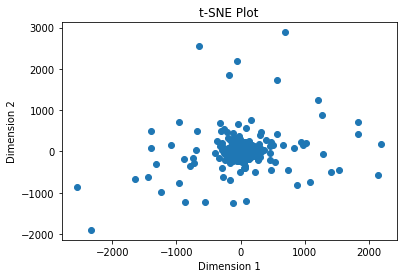

In [147]:
from tqdm import tqdm


# Drop the target column
features = df_hdma_encoded.drop(columns=['action_taken_name'])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the scaled features with a progress bar
tsne_result = []
with tqdm(total=len(scaled_features), desc="t-SNE Progress") as pbar:
    for i in range(0, len(scaled_features), 100):  # Batch processing for better performance
        batch_result = tsne.fit_transform(scaled_features[i:i+100])
        tsne_result.append(batch_result)
        pbar.update(len(batch_result))

# Concatenate the t-SNE results
tsne_result = np.concatenate(tsne_result, axis=0)

# Create a new DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=['Dimension 1', 'Dimension 2'])

# Plot the t-SNE scatter plot
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Plot')
plt.show()
